# IMPORTS

In [1]:
import pandas as pd

# READ DATA

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('./input/cardio_train.csv', sep=r';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


# EDA BLOCK

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# FEATURES PLOTTING

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

<AxesSubplot:title={'center':'DISTR of Genders (1-Female, 2-Male) '}, xlabel='GENDER', ylabel='OCCURENCE'>

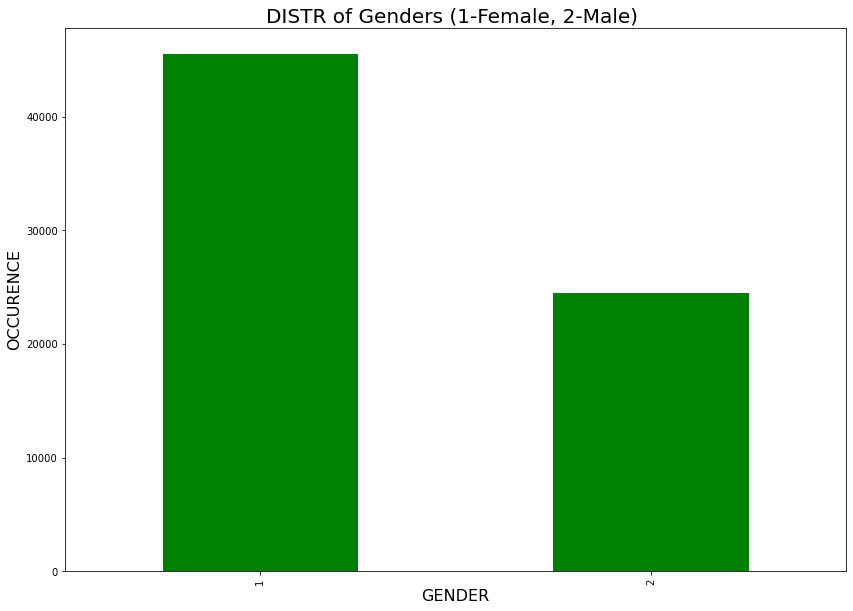

In [8]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_title('DISTR of Genders (1-Female, 2-Male) ', fontsize=20)
ax.set_xlabel('GENDER', fontsize=16)
ax.set_ylabel('OCCURENCE', fontsize=16)

df['gender'].value_counts().plot(ax=ax, kind='bar', color='green')

<AxesSubplot:title={'center':'DISTR of Heights'}, xlabel='Height in cm', ylabel='OCCURENCE'>

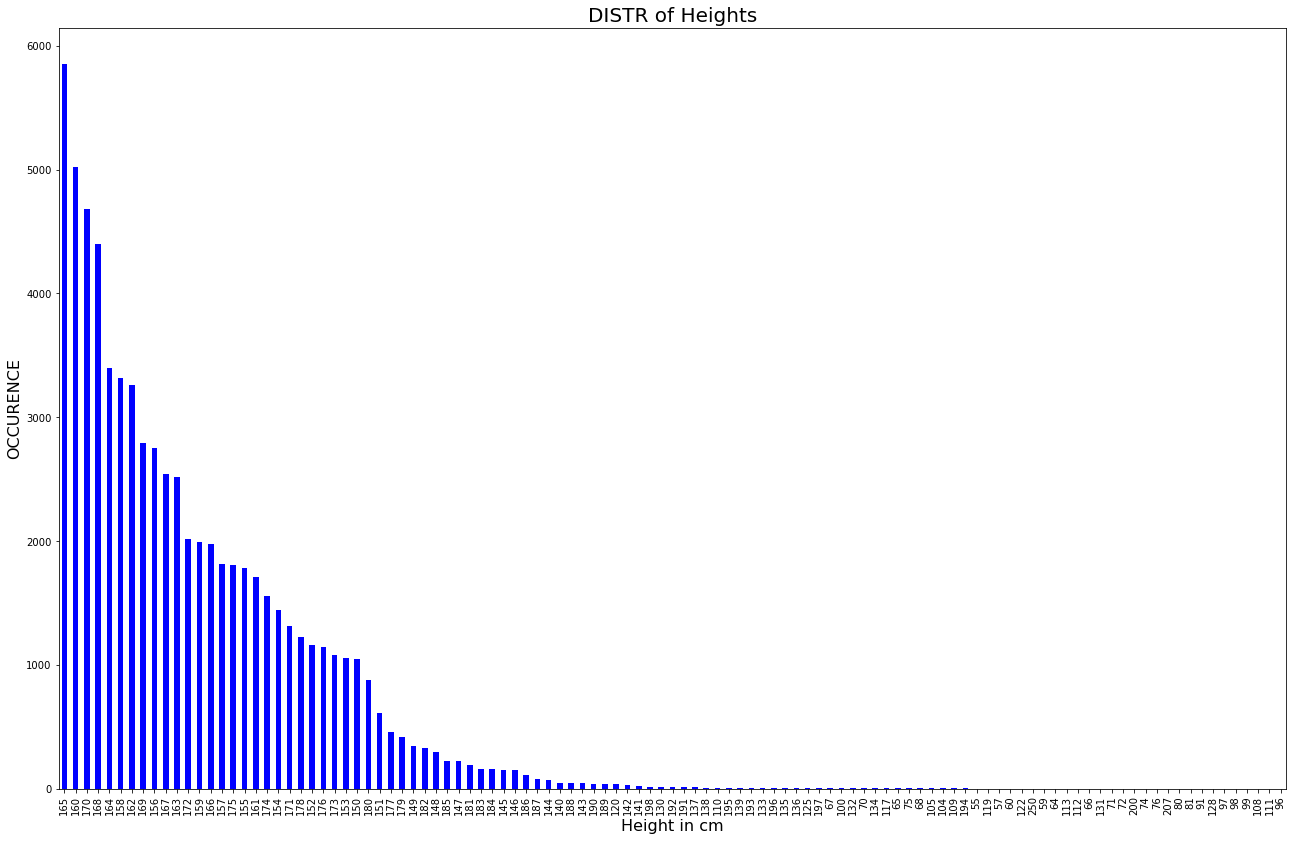

In [9]:
fig, ax = plt.subplots(figsize=(22,14))

ax.set_title('DISTR of Heights', fontsize=20)
ax.set_xlabel('Height in cm', fontsize=16)
ax.set_ylabel('OCCURENCE', fontsize=16)

df['height'].value_counts().plot(ax=ax, kind='bar', color='blue')

In [16]:
num = df['smoke'].value_counts('0')
smokers = num[0] * 70000
non_smokers = num[1] * 70000

print(f'Smokers: {int(smokers)}\nNon_smokers: {int(non_smokers)}')

Smokers: 63831
Non_smokers: 6169


# TIME TO ML

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(['smoke'], axis=1).values
y = df['smoke'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [19]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.7864571428571429


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

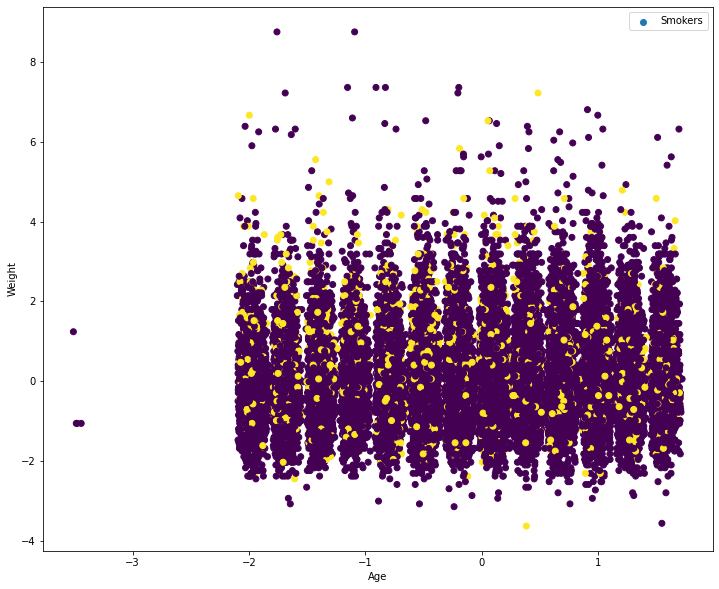

In [23]:
%matplotlib inline 

plt.figure(figsize=(12,10))
plt.scatter(X_train[:,1], X_train[:,4], c = y_train)
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(['Smokers', 'Non-smokers'], loc='best')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.9234285714285714
